In [1]:
from read_mias import *
from denoise import *
from orient import *
from rm_pec import *
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.signal import convolve2d

path = 'mias_data'
data = read_mias(path)
oriented = reorient_all(data)
denoised = denoise_all(oriented)


In [ ]:
def rm_pec(img, background_thresh = 30):
    kernel = np.array([[1/9,1/9,1/9],
                   [1/9,1/9,1/9],
                   [1/9,1/9,1/9]])
    conv = convolve2d(img, kernel, mode = 'same')
    ret, thresh = cv.threshold(img, 5,255, cv.THRESH_BINARY)
    cnts, _ = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    c = cnts[0]
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    a = int(extRight[0] - 20)
    b = int(extRight[0])
    rowmeans = img[:, a:b].mean(axis = 1)
    rowmaxes = img[:, a:b].max(axis = 1)
    mcontours = []
    for L1 in range(img.shape[0] -1):
        L2 = L1+1
        rowsmaxL = rowmaxes[[int(L1),int(L2)]].max()
        rowsmeanL = rowmeans[[int(L1),int(L2)]].mean()
        localthresh = 64 + ((rowsmeanL * 0.7 + rowsmaxL * 0.3)/2)
        pts = []
        i = extRight[0] - 20  
        val = conv[L1, i]
        if rowsmaxL > background_thresh:
            while val > localthresh:
                pts.append(i)
                i += -1
                val = conv[L1, i]
            else:
                mcontours.append((L1, i))
                
            
    return mcontours


192.0
209


[]

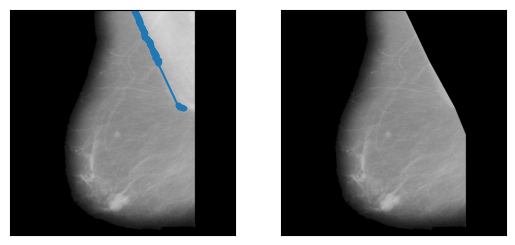

In [11]:
idx =4
img = denoised[idx]
background_thresh = np.percentile(img, 99)
print(background_thresh)
pts = pec_cntrs(img, background_thresh)
print(len(pts))
ys = [x[0] for x in pts]
xs = [x[1] for x in pts]
if len(pts) > 5:
    img_new = rm_cntrs(img, pts)
else:
    img_new = img
fig, axs = plt.subplots(1,2)
axs[0].imshow(img,cmap = 'gray')
axs[0].plot(xs, ys, marker = '.')
axs[1].imshow(img_new, cmap = 'gray')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])

In [3]:
removed_pec = rm_pec_all(denoised)


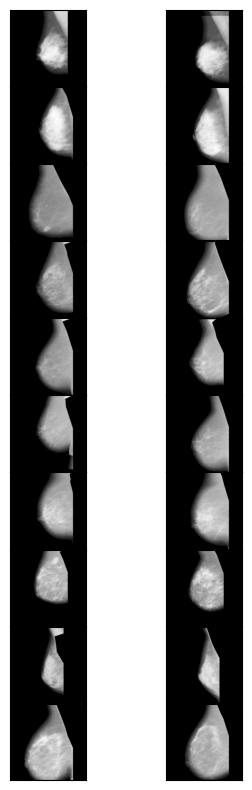

In [4]:
fig, axes = plt.subplots(10, 2, figsize = (4,10),
                         subplot_kw ={'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace=0.01, wspace = 0.01))
for i,ax in enumerate(axes.flat):
    ax.imshow(removed_pec[i],cmap = 'gray')

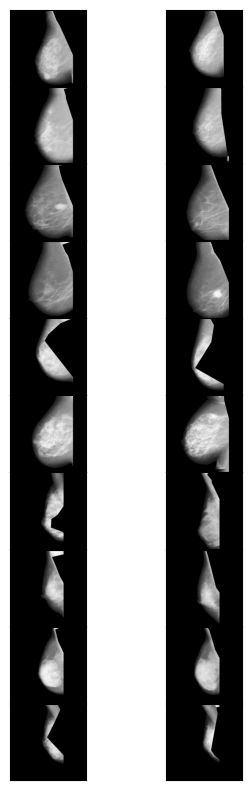

In [5]:
fig, axes = plt.subplots(10, 2, figsize = (4,10),
                         subplot_kw ={'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace=0.01, wspace = 0.01))
for i,ax in enumerate(axes.flat):
    ax.imshow(removed_pec[i + 20],cmap = 'gray')

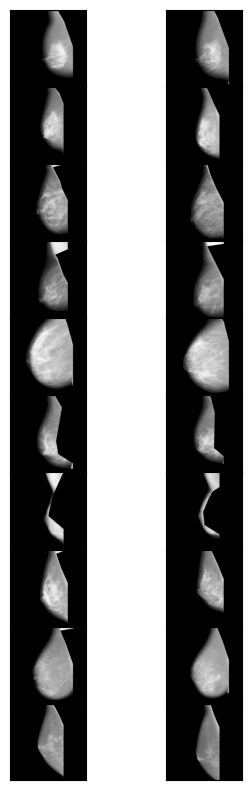

In [12]:
fig, axes = plt.subplots(10, 2, figsize = (4,10),
                         subplot_kw ={'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace=0.01, wspace = 0.01))
for i,ax in enumerate(axes.flat):
    ax.imshow(removed_pec[i + 40],cmap = 'gray')

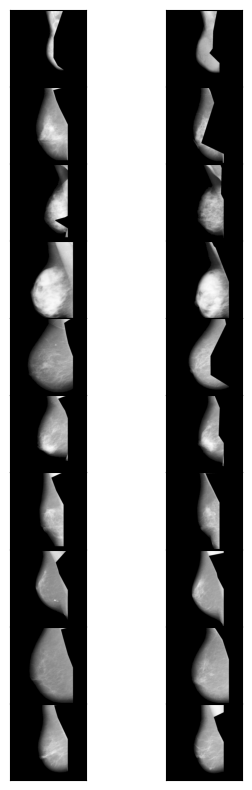

In [13]:
fig, axes = plt.subplots(10, 2, figsize = (4,10),
                         subplot_kw ={'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace=0.01, wspace = 0.01))
for i,ax in enumerate(axes.flat):
    ax.imshow(removed_pec[i + 60],cmap = 'gray')